# 噪声建模项目

### 1. 提要

<!-- #### Content
##### 2. 噪声建模理论
###### 2.1. Random telegraph noise (RTN) -->
本文档是噪声建模项目思路、调研、代码和结论的积累。

内容提要如下：
- 首先分析总结噪声建模相关的基础问题、基本方法、基本代码实现（第二部分）
- 其次对调研到的具体建模方法进行综述（第三部分）
- 接着交待数据采集方法（第四部分）
- 最后是噪声建模的实验和分析（第五部分）

### Memo
-
  - DAC、ADC的问题要解决一下，能否找厂商要到不包含ADC\DAC的裸器件？
  - 继续测试空域$1/f$噪声
  - 用中文写一段话，采取什么方法，解决什么没被解决的问题:
  - 概率论：pmf做ft：拟合
  - 忆阻器没有用RTN的原因
  - Special Issue
    - 多模态大模型：无人机 巡检 上海地铁.. 
    - Beihang：场景细化 狭窄空间(矿洞 杂物)避障Low-level 现成的无人机... 
- 
  - 通用小模型
    - 蒸馏
    - CVPR：Efficient SAM
  - 
#### Response
采取什么方法，解决什么没被解决的问题:
  - 以往涉及忆阻器仿真的工作中, 噪声建模问题未被正式讨论, 所采用的模型要么基于特定忆阻器缺乏普遍性, 要么采取高斯分布等假设设定太过简单.
  - 我们致力于提出符合理论预期并与实际噪声分布高度保真的噪声分布形式. 


### 2. 噪声建模理论

#### 2.1 Random telegraph noise (RTN)
##### 2.1.1 RTN 噪声简介
随机电报噪声(RTN) is a phenomenon commonly encountered in electronic devices, particularly in semiconductor devices such as transistors. It refers to the fluctuation in the current or voltage levels caused by the random trapping and de-trapping of charge carriers in defects within the semiconductor material. 

> *Random trapping and de-trapping*\
> 在半导体材料中，当电子或空穴被捕获或释放到能级时，就发生了捕获和释放（trapping and de-trapping）。这些能级通常是由杂质、缺陷或界面引起的，它们在材料中形成陷阱，可以吸引、捕获或释放电子或空穴。
> 具体来说，当一个电子或空穴被捕获到一个能级时，它从材料的传导带或价带中移动到该能级。这个过程导致了电荷载流子的减少，因此会引起设备电流或电压的变化。相反，当电子或空穴从能级释放时，它重新回到传导带或价带中，导致电荷载流子的增加，并再次影响设备的电流或电压。
> 捕获和释放过程是随机的，受到温度、电场和其他环境因素的影响。因此，这种随机性导致了随机电报噪声（RTN）的产生，对电子器件的性能产生影响。

半导体器件中的RTN噪声一般来源于器件或系统中的缺陷。
在工程领域，常用$1/f$ 噪声模拟RTN噪声。

##### 2.1.2 RTN 噪声中的混沌问题
Stavros (2022) 指出，random telegraph noise (RTN) 并不是随机的，而是 **“a deterministic chaotic behavior”**。
根据非线性理论，在 properly biased $\mathrm{Ni/HfO_2}$ unipolar Resistive RAM memristor nanodevices 上的实验表明，电流噪声的时间序列 (current–noise temporal series) 展现了 2D and 3D phase space projections 中的分形特点。

> Low-frequency noise analysis usually is performed in the frequency domain, adopting a statistical evaluation, often after averaging (thousands of) measurements. This averaging procedure may hide and further diminish the dynamics conditioning the demonstrated noise [3–5]. As a result, analysis of noise time series (thus in time domain) becomes imperative, when someone needs to delve into the relevant dynamics [6]. 

**References**\
Stavros G. Stavrinides, Michael P. Hanias, Mireia B. Gonzalez, Francesca Campabadal, Yiannis Contoyiannis, Stelios M. Potirakis, Mohamad Moner Al Chawa, Carol de Benito, Ronald Tetzlaff, Rodrigo Picos, Leon O. Chua,
On the chaotic nature of random telegraph noise in unipolar RRAM memristor devices,
Chaos, Solitons & Fractals,
Volume 160,
2022,
112224,
ISSN 0960-0779,
https://doi.org/10.1016/j.chaos.2022.112224.
(https://www.sciencedirect.com/science/article/pii/S0960077922004349)


##### 2.1.3 混沌和分形：研究噪声的新角度

**混沌（Chaos）：**

定义： 混沌是一种看似随机、无序而又有序的动态系统行为。在混沌系统中，微小的变化可以引起系统行为的显著改变，使得系统的长期行为变得不可预测。

特征： 典型的混沌系统表现为对初始条件极为敏感的行为，即所谓的“蝴蝶效应”，并且通常会表现出非周期性、随机性和自相似性等特征。

示例： 洛伦兹吸引子是混沌现象的经典示例，描述了由洛伦兹方程组引起的混沌运动，该方程组是描述流体动力学中对流现象的一个简化模型。

**分形（Fractal）：**

定义： 分形是一种几何形状或数学对象，其结构在不同尺度上具有相似性。分形通常表现为复杂的、自相似的图形，即使在放大或缩小尺度时，其结构仍然重复。

特征： 分形通常表现为具有分数维度的几何形状，即它们的维数不是整数。它们的结构可以由简单的规则迭代生成，并且在不同尺度上都显示出相似性。

示例： 曼德勃罗集合是分形的一个经典示例，它是一个复平面上的集合，由一组简单的迭代规则定义。曼德勃罗集合的结构在各个尺度上都呈现出相似性，并且具有分数维度。

联系和相互影响：
自相似性： 混沌系统和分形结构都展示了自相似性的特征，即它们的结构在不同尺度上都具有相似性。

复杂性： 混沌系统和分形都是复杂系统和现象的重要组成部分，它们的研究对于理解复杂系统的行为和特征具有重要意义。

模拟和可视化： 分形结构经常用于模拟自然界中复杂的几何形状，而混沌系统通常通过分形几何来描述其结构和行为。



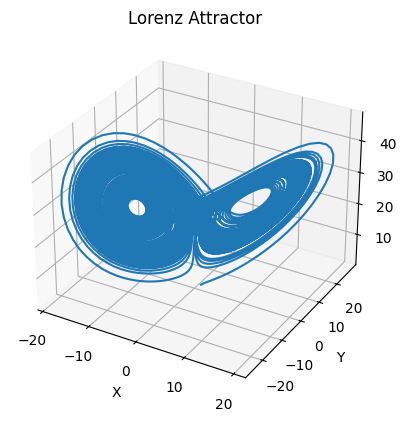

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 定义Lorenz系统的微分方程
def lorenz(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# 参数设置
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# 初始条件和时间点
xyz0 = [1.0, 1.0, 1.0]
t_span = (0, 100)
t_eval = np.linspace(*t_span, 10000)

# 解微分方程
sol = solve_ivp(lorenz, t_span, xyz0, args=(sigma, rho, beta), t_eval=t_eval)

# 绘制混沌吸引子
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Lorenz Attractor')
plt.show()


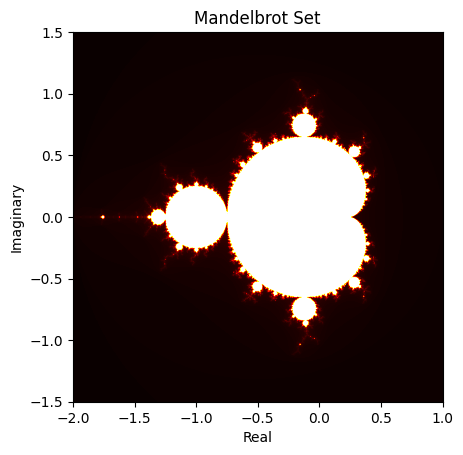

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    pixels = np.zeros((width, height))
    for i in range(width):
        for j in range(height):
            pixels[i, j] = mandelbrot(x[i] + 1j*y[j], max_iter)
    return pixels

# 设置绘图参数
xmin, xmax = -2, 1
ymin, ymax = -1.5, 1.5
width, height = 800, 800
max_iter = 255

# 生成曼德勃罗集合
mandelbrot_image = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# 绘制图像
plt.imshow(mandelbrot_image.T, extent=(xmin, xmax, ymin, ymax), cmap='hot', origin='lower')
plt.title('Mandelbrot Set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()


以上代码分别演示了混沌吸引子（Lorenz吸引子）和曼德勃罗集合的生成过程。混沌吸引子展示了洛伦兹系统中的混沌运动(遵循简单确定的规则，所以系统的任何未来状态都是*决定论的*，且展示出固有模式\[吸引子/伪周期性\]，一直围绕着“8”字环周围运动；但是由于规则是非线性的，这运动又永远不会周期循环)，而曼德勃罗集合则是一个著名的分形图案，展示了一种复杂且自相似(有鲜明的自身特点，但又绝不相同)的结构。

混沌系统的特性决定了其在某种程度上是不可预测的。尽管理论上可以根据已知的初始条件和动力学方程来预测混沌系统的未来状态，但在实际应用中，由于数值计算的限制、参数不确定性和外部扰动等因素的影响，混沌系统的长期预测通常是非常困难甚至不可行的。

#### 2.1.4 *潜在的创新点*: 从截面数据上判断噪是否存在混沌
在没有时间维度的数据中，可以通过分析数据的空间相关性来寻找混沌特征。例如，在物理或生态系统中，混沌可以导致空间模式的不规则分布。

通过计算空间自相关函数或构建空间相互作用网络，可以揭示潜在的非线性动力学特性。

尝试重构空间相空间并分析其几何特性，如是否存在奇异吸引子。

#### 2.2. 粉色噪声 (也称为分形噪声或$1/f$ 噪声)
##### 2.2.1 能否直接使用同分布的高斯分布来建模噪声？(频域方法 vs 统计分布方法)

我们之前考虑高斯分布建模噪声问题总是假设*独立同分布*，然而，“同分布”即使在hwkit中也没有被采用。hwkit采用的虽然是独立的高斯噪声，但是在不同的memristor cell上，高斯分布的标准差是由写入的目标电导值 $g_{target}$ 决定的，详参 3.1 节。

进一步，如果噪声带有粉色噪声的性质，采用高斯分布来建模噪声就一定不是一个有道理的做法，因为高斯分布是一个对称的钟形曲线，而粉色噪声的功率谱密度与频率的倒数成反比关系，不符合高斯分布的特性。因此，简单地使用高斯分布来建模粉色噪声可能会导致不符合预期的结果。

然而，可以通过一些技巧和变换来间接地使用高斯分布来生成粉色噪声。例如，可以采用滤波器方法，首先生成高斯白噪声，然后通过一个特定的滤波器将其转换为粉色噪声。这个滤波器的频率响应应该是与频率的倒数成比例关系，以产生粉色噪声的特性。

<!-- 总的来说，虽然可以通过一些变换来间接地使用高斯分布来建模粉色噪声，但直接使用高斯分布并不是一种常见或直接的方法。通常更常见的做法是采用其他更适合的方法，如频域方法或统计分布方法来建模粉色噪声。 -->

##### 2.2.2 我们如何借助高斯分布建模 $1/f$ 噪声？

制定一个用于将高斯白噪声转换为粉色噪声的滤波器，可以采用数字滤波器设计方法。一种常见的方法是使用FIR（有限脉冲响应）滤波器或IIR（无限脉冲响应）滤波器。在这里，我将提供一个简单的FIR滤波器设计示例。

假设我们想要设计一个FIR滤波器，其频率响应与所需的粉色噪声频谱特性成比例关系。由于粉色噪声的频谱特性是与频率的倒数成反比关系，我们可以设计一个低通滤波器，其频率响应是频率的倒数函数。

下面是一个用Python和SciPy库来设计和绘制这样一个FIR滤波器的示例代码：

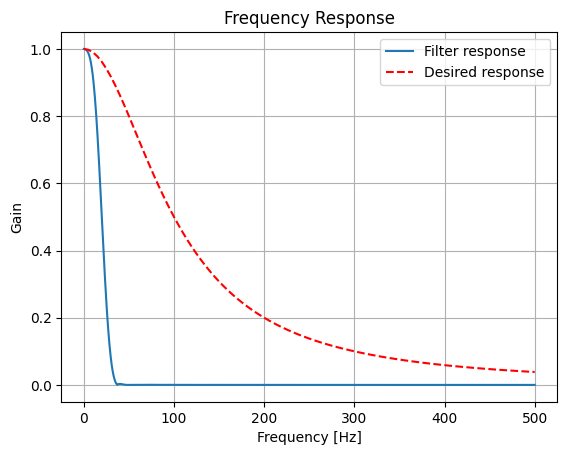

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 设计FIR滤波器
fs = 1000  # 采样率
cutoff_freq = 20  # 截止频率
num_taps = 101  # 滤波器系数数量

# 生成理想的频率响应
nyquist_freq = 0.5 * fs
cutoff_ratio = cutoff_freq / nyquist_freq
freq_response = 1 / (1 + (np.arange(num_taps) / nyquist_freq / cutoff_ratio) ** 2)

# 使用firwin函数设计滤波器
filter_taps = signal.firwin(num_taps, cutoff_freq, nyq=nyquist_freq)

# 绘制频率响应
freq, response = signal.freqz(filter_taps, worN=8000)
plt.plot((fs * 0.5 / np.pi) * freq, abs(response), label='Filter response')
plt.plot(np.linspace(0, nyquist_freq, num_taps), freq_response, 'r--', label='Desired response')
plt.title('Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.legend()
plt.grid()
plt.show()


在这个示例中，我们设计了一个101个系数的FIR滤波器，截止频率为20Hz。然后，我们绘制了设计的滤波器的频率响应以及所需的频率响应。可以看到，设计的滤波器频率响应与所需的频率响应大致成比例关系，符合粉色噪声的特性。

这个滤波器可以应用于高斯白噪声信号，以生成符合粉色噪声频谱特性的信号。

> 在频域分析中，"Gain"（增益）通常表示滤波器对信号幅度的变化。对于一个滤波器，其频率响应描述了滤波器对不同频率成分的响应程度。增益则表示了这种响应的大小，通常以对数尺度表示。\
> 在上述代码中，我们绘制了滤波器的频率响应。Y轴上标记为"Gain"的内容表示滤波器对输入信号在不同频率上的响应强度。增益值越大，滤波器对该频率成分的响应就越强，而增益值越小，滤波器对该频率成分的响应就越弱。\
> 对于粉色噪声滤波器的频率响应，增益值的变化应该反映了频率越高，信号的衰减越快的特性，因为粉色噪声的功率谱密度与频率的倒数成反比关系。

> "desired response"（期望响应）通常指的是我们希望滤波器在不同频率上的响应模式。在设计粉色噪声滤波器时，我们希望滤波器的频率响应能够与粉色噪声的频谱特性尽可能地匹配，即在不同频率上有所衰减，但保持一定的平坦性，以产生类似于粉色噪声的效果。
> 在上述代码中，我们绘制了滤波器的频率响应，并将其与所需的频率响应（desired response）进行比较。所需的频率响应是根据粉色噪声的频谱特性而确定的，通常是一个反比例函数，即 $1/f$。
> 在绘制频率响应图时，将所需的频率响应（desired response）与设计的滤波器的频率响应进行比较，可以帮助我们评估设计的滤波器是否符合预期的特性，并且是否能够有效地将高斯白噪声转换为粉色噪声。

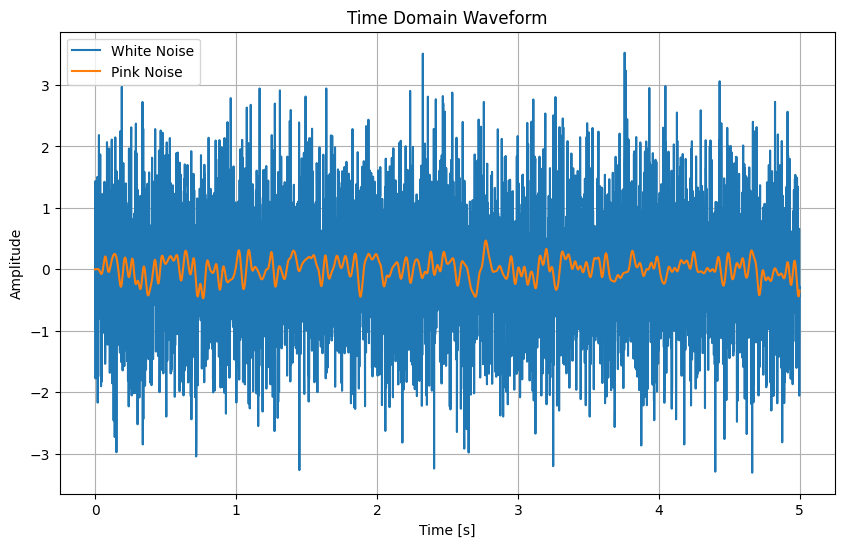

In [19]:
# 生成高斯白噪声信号
fs = 1000  # 采样率
duration = 5  # 信号持续时间
num_samples = int(fs * duration)
white_noise = np.random.normal(0, 1, num_samples)

# 使用之前设计的FIR滤波器滤波
cutoff_freq = 20  # 截止频率
nyquist_freq = 0.5 * fs
filter_taps = signal.firwin(101, cutoff_freq, nyq=nyquist_freq)  # 使用相同的FIR滤波器

pink_noise = signal.lfilter(filter_taps, 1, white_noise)  # 使用FIR滤波器进行滤波

# 绘制高斯白噪声和粉色噪声的时域波形
time = np.arange(num_samples) / fs
plt.figure(figsize=(10, 6))
plt.plot(time, white_noise, label='White Noise')
plt.plot(time, pink_noise, label='Pink Noise')
plt.title('Time Domain Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


在上面的示例中，我们首先生成了持续5秒的高斯白噪声信号。然后，我们使用之前设计的FIR滤波器对该信号进行滤波，以生成粉色噪声信号。最后，我们绘制了高斯白噪声和粉色噪声的时域波形，以可视化它们之间的差异。

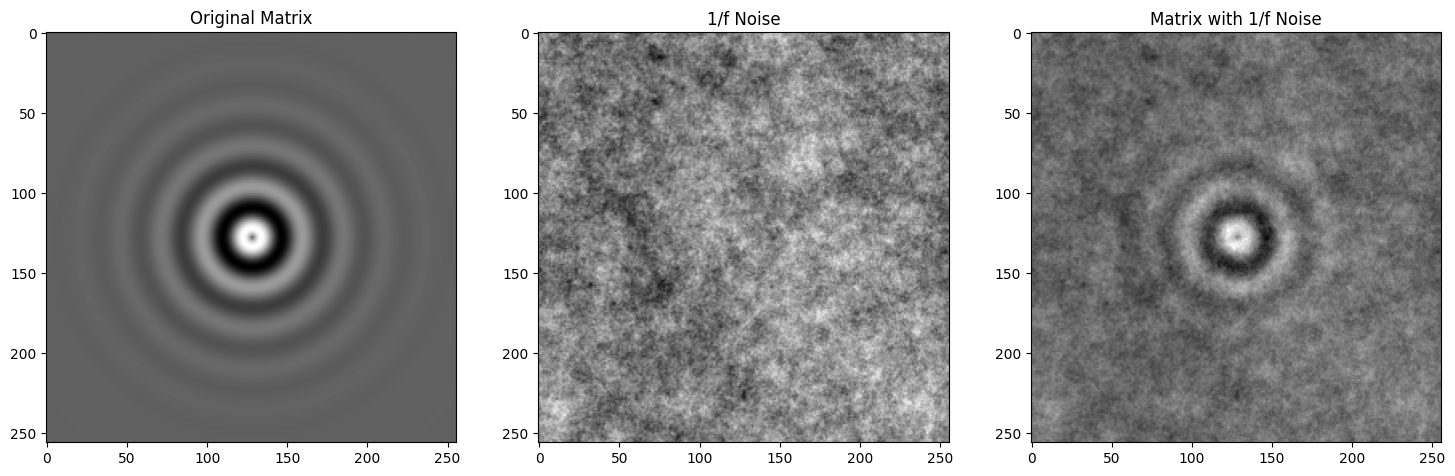

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_1_f_noise(size):
    # 生成白噪声
    white_noise = np.random.randn(size, size)
    # 进行傅里叶变换
    fft_noise = np.fft.fft2(white_noise)
    # 获取频率
    u, v = np.meshgrid(np.fft.fftfreq(size), np.fft.fftfreq(size), indexing='ij')
    # 计算频率的欧几里得距离，加一个小常数避免除以0
    freq = np.sqrt(u**2 + v**2) + 1e-12
    # 应用1/f滤波
    fft_noise_filtered = fft_noise / freq
    # 进行逆傅里叶变换
    noise_1_f = np.fft.ifft2(fft_noise_filtered).real
    return normalize(white_noise), normalize(noise_1_f)

def create_frequency_gradient(size):
    # 创建一个频率梯度矩阵，从高频到低频
    gradient = np.zeros((size, size))
    # 横向为高频到低频
    for i in range(size):
        for j in range(size):
            gradient[i, j] = np.sin(2 * np.pi * ((i + j) * (size / 2) / size)) * np.cos(2 * np.pi * ((i + j) * (size / 2) / size))
    return normalize(gradient)

def create_symmetric_frequency_wave(size):
    # 创建一个对称的频率波浪图
    wave = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            distance = np.sqrt((i - center)**2 + (j - center)**2)
            wave[i, j] = np.sin(2 * np.pi * distance / size * 10) * np.exp(-distance / size * 10)
    return wave

def normalize(matrix):
    # 归一化统一尺度
    min = matrix.min()
    max = matrix.max()
    return (matrix - min) / (max - min)

# 定义矩阵大小
size = 256
# 生成1/f噪声
white_noise, noise_1_f = generate_1_f_noise(size)

# 生成频率梯度图作为示例矩阵并添加1/f噪声
# original_matrix = create_frequency_gradient(size)
# 生成频率波浪图作为示例矩阵并添加1/f噪声
original_matrix = create_symmetric_frequency_wave(size)
matrix_with_noise = original_matrix + noise_1_f

# 可视化结果
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_matrix, cmap='gray')
plt.title('Original Matrix')
plt.subplot(1, 3, 2)
plt.imshow(noise_1_f, cmap='gray')
plt.title('1/f Noise')
plt.subplot(1, 3, 3)
plt.imshow(matrix_with_noise, cmap='gray')
plt.title('Matrix with 1/f Noise')
plt.show()


以上已经说明了 $1/f$ 噪声对高频信号影响小对低频信号影响大。

那么，为什么说这样的噪声是我们应当采用的(凭什么认为读取噪声是 $1/f$ 噪声)？

##### 2.2.3 为什么采用 $1/f$ 噪声是合理的？
使用1/f噪声而不是高斯噪声通常是出于以下几个原因：
- 自相似性： 1/f噪声具有自相似性，意味着在不同时间或频率尺度上观察时，其统计特性保持不变。这种自相似性在许多自然现象和复杂系统中都是观察到的，因此1/f噪声更符合真实世界中许多现象的性质。
- 更接近自然信号： 许多自然信号，如心跳、脑电图、地震、气候模式等，都表现出1/f噪声的特性。因此，在模拟或处理这些信号时，使用1/f噪声可以更好地模拟真实世界中的信号。
- 非线性系统建模： 在许多非线性系统建模中，1/f噪声更符合实际系统的行为。高斯噪声通常假定为线性系统的结果，而1/f噪声则更适用于非线性系统的建模。
- 频谱特性： 1/f噪声的频谱密度随频率减小而增加，与许多自然和人工信号的频谱特性更匹配。相比之下，高斯噪声的频谱密度是常数，无法捕捉到这种变化。
- 缺陷建模： 在工程领域，1/f噪声常用于模拟器件或系统中的缺陷，例如半导体器件中的随机电报噪声（RTN）等。

因此，虽然高斯噪声在某些情况下也是有用的，但1/f噪声通常更适合模拟和处理许多复杂系统和信号。

##### 2.2.4 我们如何从噪声样本中的和识别/估计出 $1/f$ 噪声的滤波特性(以便对噪声进行仿真)？
首先注意到，我们的分析着眼于任意时刻的空间 $1/f$ 噪声频谱，而非同一信号在时域上的频谱，即在*截面数据*采样并建模噪声。

> - 采用截面数据而非时间序列数据来估计1/f噪声的特性是可能的，尤其是在物理、生物学或其他科学研究中，当研究对象不易于时间跟踪或当数据在空间而非时间维度上收集时。在这种情况下，截面数据（或空间数据）可以被视为“时间冻结”的实例，其中1/f噪声的特性可以通过类似于时间序列分析的方法在空间维度上进行估计。
> - 对于空间数据，1/f噪声的分析依然依赖于频率的概念，但这里的“频率”是指空间频率而非时间频率。空间频率描述了空间结构的变化速度，例如，一个图像中的纹理或是地形数据中的地貌特征。

步骤概述：
- 收集截面数据：确保数据具有足够的空间变异性，适用于1/f噪声分析。
- 计算空间频域表示：使用二维快速傅里叶变换（2D FFT）将空间数据从空间域转换到频率域。
- 计算功率谱密度（PSD）：计算转换后数据的功率谱密度，与时间序列分析类似，但应用于空间频率。
- 对数-对数图表示：在对数-对数图上绘制PSD与空间频率的关系。
- 估计斜率：通过线性回归分析对数-对数图，估计PSD随空间频率变化的斜率，判断是否接近-1，以确认1/f噪声的特性。

一个例子：

在这里，我们尝试使用之前的对称2D波浪图作为“截面数据”的示例来分析其1/f噪声特性。通过计算二维空间频域傅里叶变换并绘制功率谱密度（PSD）与空间频率的对数-对数图，我们可以观察数据的频率特性。



上图绘制了一个对数-对数图，展示了功率谱密度（PSD）与空间频率半径的关系。
点的分布揭示了随着空间频率的增加，PSD通常呈现下降趋势，这是1/f噪声特性的一种表现。这种方法允许我们在处理空间数据（如图像或地形数据）时，估计和分析1/f噪声的特性。

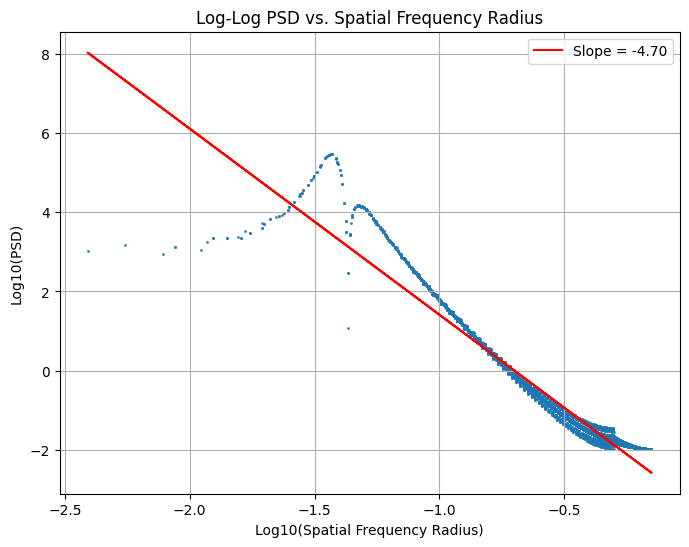

-4.695318852739839

In [21]:
from scipy.fft import fft2, fftshift

# 生成对称2D波浪图 symmetric_wave
symmetric_wave = create_symmetric_frequency_wave(size)  # noise_1_f 

# 步骤1: 计算2D快速傅里叶变换（FFT）
fft_symmetric_wave = fft2(symmetric_wave)
fft_symmetric_wave_shifted = fftshift(fft_symmetric_wave)  # 将零频率分量移到中心

# 步骤2: 计算功率谱密度（PSD）
psd_symmetric_wave = np.abs(fft_symmetric_wave_shifted) ** 2

# 计算频率轴
freqs_x = np.fft.fftshift(np.fft.fftfreq(symmetric_wave.shape[0]))
freqs_y = np.fft.fftshift(np.fft.fftfreq(symmetric_wave.shape[1]))
radius = np.sqrt(freqs_x[:, None]**2 + freqs_y[None, :]**2)
radius_flat = radius.flatten()
psd_flat = psd_symmetric_wave.flatten()

# 移除零频率以避免对数运算中的问题
non_zero_indices = radius_flat > 0
log_radius = np.log10(radius_flat[non_zero_indices])
log_psd = np.log10(psd_flat[non_zero_indices])

# 步骤3和4: 对数-对数图和线性回归估计斜率
plt.figure(figsize=(8, 6))
plt.scatter(log_radius, log_psd, alpha=0.3, s=1)
plt.xlabel('Log10(Spatial Frequency Radius)')
plt.ylabel('Log10(PSD)')
plt.title('Log-Log PSD vs. Spatial Frequency Radius')
plt.grid(True)

# 线性回归估计斜率
slope, intercept = np.polyfit(log_radius, log_psd, 1)
plt.plot(log_radius, slope*log_radius + intercept, 'r', label=f'Slope = {slope:.2f}')
plt.legend()

plt.show()

slope


在对数-对数图中，我们展示了对称2D波浪图的功率谱密度（PSD）与空间频率半径的关系。通过线性回归分析，我们估计了PSD与频率之间关系的斜率为约-4.70。这个斜率值表明，虽然数据展现了随频率变化的功率衰减特性，但其衰减速率比典型的1/f噪声（斜率接近-1）要快得多。

这种快速的衰减可能是由于我们分析的波浪图特性与1/f噪声的典型特性不完全匹配，或者是因为波浪图中包含的频率成分与1/f噪声的分布有所不同。这个结果强调了在不同类型的数据中分析1/f噪声特性时可能遇到的复杂性，以及对于特定数据集，需要进行详细分析以准确识别和量化其频率特性。 ​

进一步对 $1/f$ 噪声采取分析，slope应当很接近 -2：

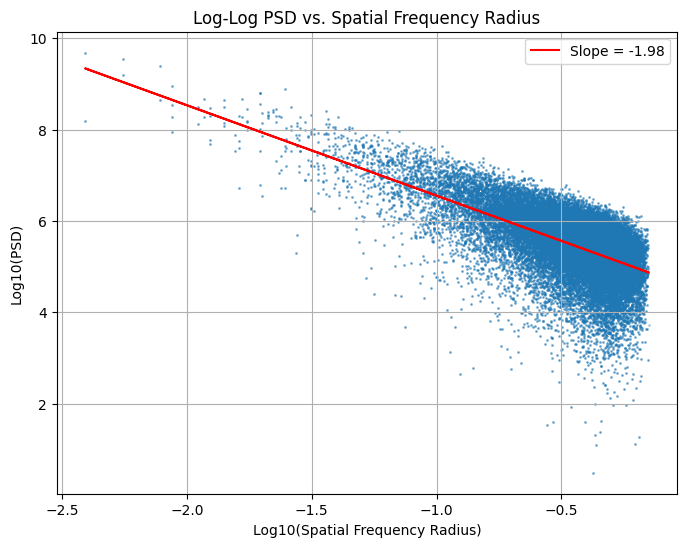

-1.977920745685447

In [22]:
white_noise = np.random.randn(size, size)
# 进行傅里叶变换
fft_noise = np.fft.fft2(white_noise)
# 获取频率
u, v = np.meshgrid(np.fft.fftfreq(size), np.fft.fftfreq(size), indexing='ij')
# 计算频率的欧几里得距离，加一个小常数避免除以0
freq = np.sqrt(u**2 + v**2) + 1e-12
# 应用1/f滤波
fft_noise_filtered = fft_noise / freq
# 进行逆傅里叶变换
noise_1_f = np.fft.ifft2(fft_noise_filtered).real

symmetric_wave = noise_1_f 

# 步骤1: 计算2D快速傅里叶变换（FFT）
fft_symmetric_wave = fft2(symmetric_wave)
fft_symmetric_wave_shifted = fftshift(fft_symmetric_wave)  # 将零频率分量移到中心

# 步骤2: 计算功率谱密度（PSD）
psd_symmetric_wave = np.abs(fft_symmetric_wave_shifted) ** 2

# 计算频率轴
freqs_x = np.fft.fftshift(np.fft.fftfreq(symmetric_wave.shape[0]))
freqs_y = np.fft.fftshift(np.fft.fftfreq(symmetric_wave.shape[1]))
radius = np.sqrt(freqs_x[:, None]**2 + freqs_y[None, :]**2) #** 2
radius_flat = radius.flatten()
psd_flat = psd_symmetric_wave.flatten()

# 移除零频率以避免对数运算中的问题
non_zero_indices = radius_flat > 0
log_radius = np.log10(radius_flat[non_zero_indices])
log_psd = np.log10(psd_flat[non_zero_indices])

# 步骤3和4: 对数-对数图和线性回归估计斜率
plt.figure(figsize=(8, 6))
plt.scatter(log_radius, log_psd, alpha=0.3, s=1)
plt.xlabel('Log10(Spatial Frequency Radius)')
plt.ylabel('Log10(PSD)')
plt.title('Log-Log PSD vs. Spatial Frequency Radius')
plt.grid(True)

# 线性回归估计斜率
slope, intercept = np.polyfit(log_radius, log_psd, 1)
plt.plot(log_radius, slope*log_radius + intercept, 'r', label=f'Slope = {slope:.2f}')
plt.legend()

plt.show()

slope


对于$1/f$噪声，其PSD特性表明，在对数-对数尺度上，PSD与频率的关系呈线性下降，其斜率理论上接近于-2。这意味着信号在较低频率上具有更高的功率密度，而在较高频率上功率密度较低。

##### 2.2.5 更灵活的形式：拟合 $\hat{PSD}(f)$
拟合更加复杂的功率谱密度（PSD）与频率（f）曲线，特别是当曲线不仅仅遵循简单的1/f噪声模型时，需要采用更灵活和高级的方法。这些方法可以包括非线性模型拟合、多组分模型、非线性最小二乘法、谱方法和小波变换、贝叶斯方法，或是基于物理或数学原理的自定义模型。

##### 2.2.6 基于 $1/f$ 方法的噪声的建模和采样
一旦获得了功率谱密度（PSD）关于频率（f）的拟合多项式后，如果希望基于这个多项式模型生成符合该PSD特性的采样函数（即时间序列数据），可以通过以下步骤来实现：

- 步骤 1: 生成白噪声
    首先，生成一个白噪声序列。白噪声具有恒定的功率谱密度，意味着其所有频率上的能量分布是均匀的。这将作为转换过程的基础。
- 步骤 2: 计算白噪声的FFT
    对生成的白噪声序列进行快速傅里叶变换（FFT），得到其在频率域的表示。
- 步骤 3: 应用PSD模型调整频率成分
    根据拟合得到的PSD模型，调整FFT结果的幅度。具体地，对于每个频率成分，根据PSD模型计算其应有的幅度，然后调整FFT结果中对应频率成分的幅度，使之与PSD模型一致。这一步不改变相位信息，只调整幅度。
- 步骤 4: 进行逆FFT
    将调整后的频率域数据通过逆快速傅里叶变换（IFFT）转换回时间域，得到最终的采样函数。

代码实现如下：

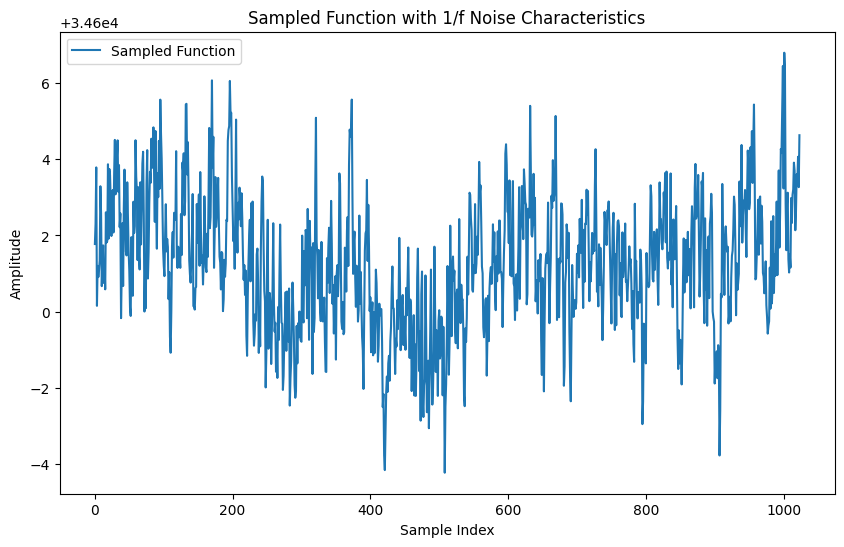

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq

# 定义PSD模型函数
def psd_model(f, A, alpha):
    # 避免除以0的情况
    f = np.where(f == 0, 1e-12, f)
    return A / (f**alpha)

# 生成符合特定PSD模型的采样函数
def generate_sampled_function(N, sampling_rate, psd_model, params):
    white_noise = np.random.normal(0, 1, N)
    fft_noise = fft(white_noise)
    freqs = fftfreq(N, d=1/sampling_rate)
    psd_adjustment = np.sqrt(psd_model(freqs, *params))
    adjusted_fft_noise = fft_noise * psd_adjustment
    sampled_function = ifft(adjusted_fft_noise).real
    return sampled_function

# 使用示例
N = 1024  # 数据点数
sampling_rate = 1.0  # 采样率
A = 1.0  # PSD模型参数A
alpha = 1.0  # PSD模型参数alpha，1/f噪声

# # 生成采样函数
# sampled_function = generate_sampled_function(N, sampling_rate, psd_model, (A, alpha))
def psd_model(f, A, alpha):
    f = np.where(f == 0, 1e-12, f)  # 避免除以0
    psd = A / (f**alpha)
    return np.where(psd <= 0, 1e-12, psd)  # 确保PSD值为正

# 重新生成符合特定PSD模型的采样函数
sampled_function = generate_sampled_function(N, sampling_rate, psd_model, (A, alpha))


# 可视化生成的采样函数
plt.figure(figsize=(10, 6))
plt.plot(sampled_function, label='Sampled Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Sampled Function with 1/f Noise Characteristics')
plt.legend()
plt.show()


#### 2.3 特征函数
##### 2.3.1 概念
概率论中的特征函数是一种重要的数学工具，用于描述随机变量的分布。给定一个随机变量 $X$，其特征函数 $\varphi_X(t)$ 定义为随机变量 $X$ 的傅里叶变换，具体定义为：

$$
    \varphi_X(t) = E[e^{itX}],
$$

其中 $E$ 表示数学期望，$i$ 是虚数单位，$t$ 是实数。

特征函数有几个重要性质：

1. **唯一性**：随机变量的分布可以由其特征函数唯一确定。这意味着如果两个随机变量的特征函数相同，那么这两个随机变量具有相同的分布。
2. **反演定理**：在一定条件下，可以通过特征函数来求得随机变量的分布函数。
3. **可加性**：如果两个随机变量 $X$ 和 $Y$ 独立，那么它们之和的特征函数是各自特征函数的乘积，即 $\varphi_{X+Y}(t) = \varphi_X(t) \cdot \varphi_Y(t)$。

特征函数在概率论和统计学中有着广泛的应用，包括在分布的识别、独立性的检验、以及随机过程的分析中。通过特征函数，可以更加方便地研究随机变量的性质，以及它们的联合分布和边缘分布。

##### 2.3.2 例子

给定随机变量 $X$ 服从标准正态分布 $N(0,1)$，我们计算了其特征函数 $\phi X(t) 在 $t=1$ 时的值为 $0.6065+0j$。这里，实部是 
$0.6065$，虚部是 
$0$，表示在 
$t=1$ 时特征函数的值。

In [1]:
import numpy as np

# 定义随机变量X的分布：假设X服从标准正态分布 N(0,1)
mu = 0  # 均值
sigma = 1  # 标准差

# 计算特征函数φX(t)的值，这里以t=1为例
t = 1
phi_X_t = np.exp(1j * mu * t - 0.5 * sigma**2 * t**2)

phi_X_t


(0.6065306597126334+0j)



### 3. 噪声建模方法调研

#### 3.1. AIHWKIT PCM (Phase-change memory)

The model simulates three different sources of noise from the PCM array: 
- programming noise (写入误差): conductances 在 target 和 programmed values 之间的误差 (using a closed-loop iterative write-read-verify scheme)
    $$
    g_{prog} = g_{target} + \mathcal{N}(0, \sigma_{prog})
    $$
    其中
    $$
    \sigma_{prog}=\max(-1.1731g_{target}^2+1.9650g_{target}+0.2635,0)
    $$
    注意到$\sigma_{prog}$又是$g_{target}$的函数，函数作图后形如：
    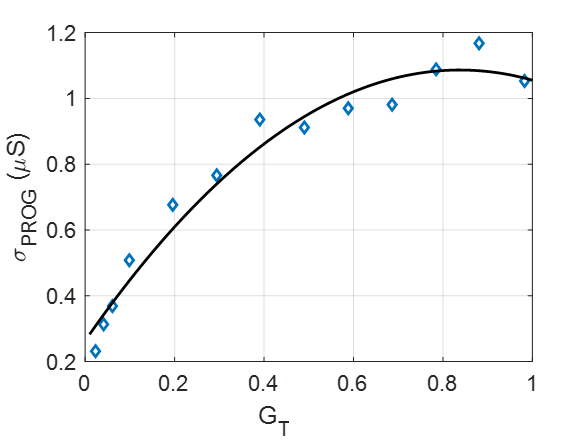
- read noise: programme之后，在矩阵向量乘的过程中，也存在着 instantaneous fluctuations 即随机发生的瞬时波动，由于内在原因(intrinsic noise)。
    PCM展现出了两种特点的噪声：$1/f$和RTN(Random Telegraph Noise)。
    - $1/f$噪声也称分形噪声或粉色噪声，其中$f$代表频率，因而是一种幅度(功率谱密度)与频率成反比的噪声，即$S(f)\propto\frac{1}{f}$，详参2.1节。
    - RTN: random telegraph noise，详参2.2节。
- temporal drift: 随着时间的推移，magnitude of the PCM weights逐渐衰减。hwkit中采取的是近似补偿法，假设所有的权重有相同的半衰期，那么只需要用全1向量来求出所有权重之和，与初始时相比就可以算出补偿系数：

    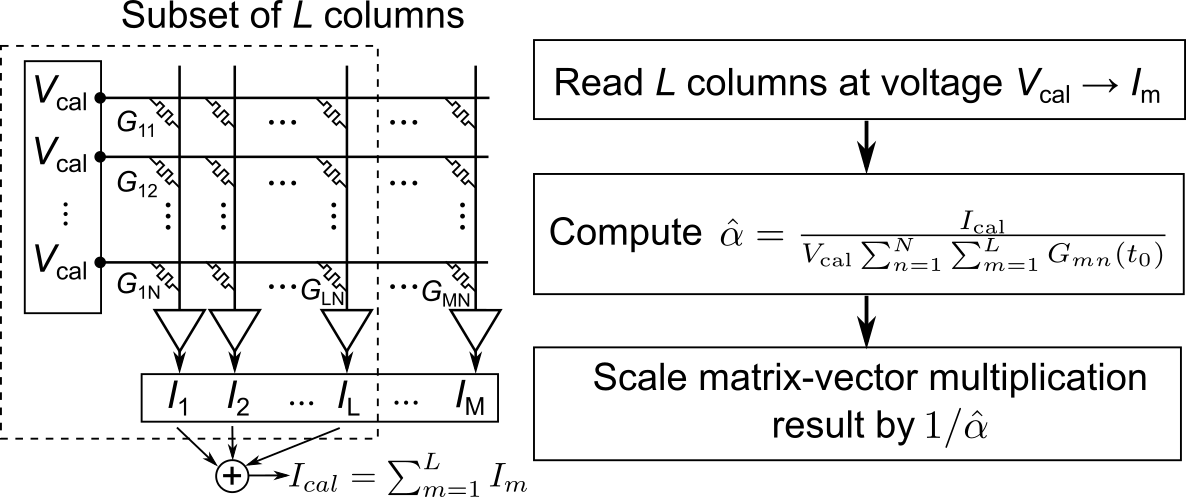


The model is only used during inference and therefore it is assumed that network weights have been trained beforehand in software. The diagram below explains how these three sources of noise are incorporated during inference when using the statistical model:

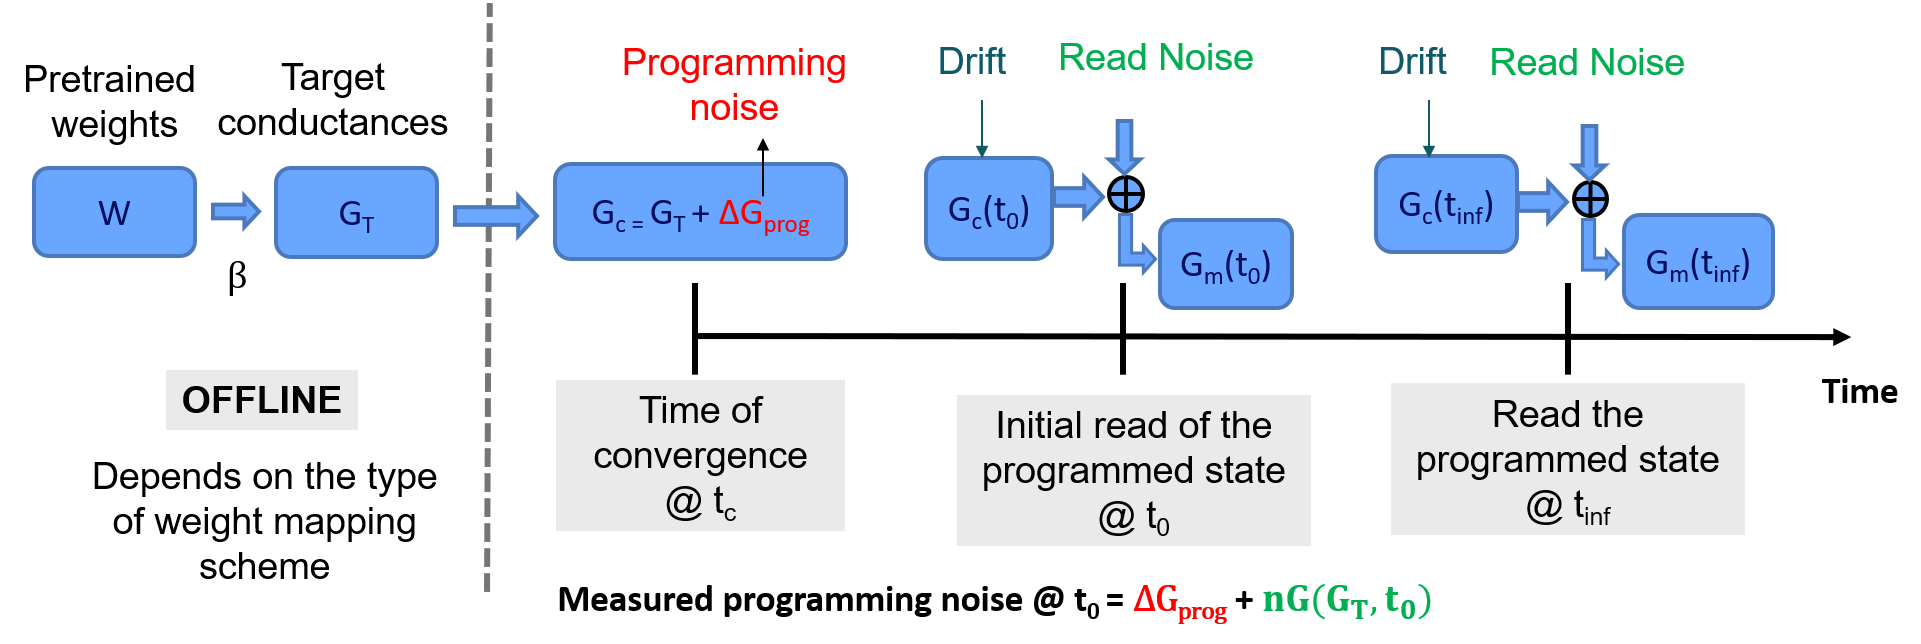    
    
    

    https://aihwkit.readthedocs.io/en/latest/pcm_inference.html

#### 3.2 AIHWKIT ReRAM 
在  `reram.py`  中的 ReRamWan2022NoiseModel 定义了针对ReRAM（电阻式随机存取存储器）
设备的噪声。这个模型的噪声是基于对ReRAM设备的实验数据进行分析和逼近得到的。不同于 PCM ，`reram.py`中考虑 ReRAM 的噪声只有两类：
- 编程噪声（Programming Noise）：通过一个多项式函数来模拟编程噪声，并添加到目标电导率上。
- 累积噪声（Accumulated Noise）：根据时间推断出的ReRAM设备的⻓期漂移行为，以多项式形式表示，然后添加到目标电导率上。 两种噪声作用的阶段有所不同：编程噪声是在初始阶段应用的，而漂移噪声则模拟了随时间累积的噪声。

值得注意的是，对于ReRAM，hwkit未考虑读取噪声。

#### 3.3 AIHWKIT Base + Custom

在/home/anonymous/anaconda3/envs/hwkit/lib/python3.9/site-packages/aihwkit/inference/noise/ 下有4个文件

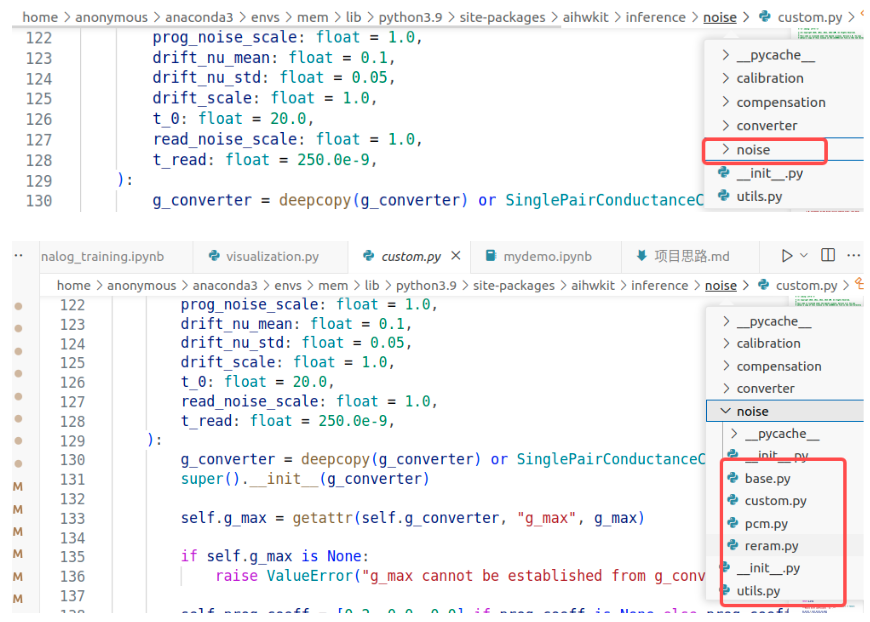

- `base.py`  提供的是用于推理的现象学噪声模型的基础类（BaseNoiseModel）。
    - BaseNoiseModel 定义了现象学噪声模型的基本框架和接口。它包括了如何将噪声应用到权重上的一般方法，例如 apply_noise、apply_programming_noise 和 apply_drift_noise。
    - 这个基类也定义了一些方法的框架，如 apply_programming_noise_to_conductance 和  apply_drift_noise_to_conductance，但没有具体实现这些方法（标记为 raise NotImplementedError），即这些方法需要在子类中被覆写和具体实现。
- `custom.py`  基类的一个具体实现。
    - StateIndependentNoiseModel。它继承了基础类并提供了具体的噪声模型实现。在这个实现中，apply_programming_noise_to_conductance 和 apply_drift_noise_to_conductance 等方法被具体定义，包括了如何生成和应用编程噪声和漂移噪声。
    - StateIndependentNoiseModel 还引入了一些额外的属性和方法，用于处理特定于该模型的行为，例如处理编程噪声和漂移噪声的特定参数。
    - 编程噪声代码在第 178 行：
        ```
        g_prog = g_target + self.prog_noise_scale * sig_prog * randn_like(g_target)
        ```
    - 累积噪声代码在第 188 行：
        ```
        g_prog = g_target + self.prog_noise_scale * sig_prog * randn_like(g_target)
        ```

### 4. 数据采集
通过采集不同环境下的噪声数据，对噪声进行建模。

数据存储在 trial_{}.npy 文件中，其中{}为0-9的数字，代表 10 次实验。每次实验是在 ReRAM 上调用一次矩阵向量乘法。

其中每个文件是一个字典，包含以下键：

dict_keys(['input_array', 'weight_target', 'weight_real', 'output_cpu', 'output_rram'])

其中 input_array 是输入矩阵，weight_target 是目标权重，weight_real 是实际权重，output_cpu 是 CPU 上的输出，output_rram 是 ReRAM 上的输出。

通过数据采集的结果，对噪声进行建模。


### 5. 噪声建模

In [24]:
import numpy as np

In [25]:
dict0 = np.load("trial_0.npy", allow_pickle=True).item()
# keys = dict0.keys()
# for key in keys:
#     for i in range(10):
#         dict0[key] += np.load("trial_" + str(i) + ".npy", allow_pickle=True).item()[key]

#### 5.1. Read Noise

In [26]:
# 矩阵权重
weight_target = dict0['weight_target']
weight_real = dict0['weight_real']

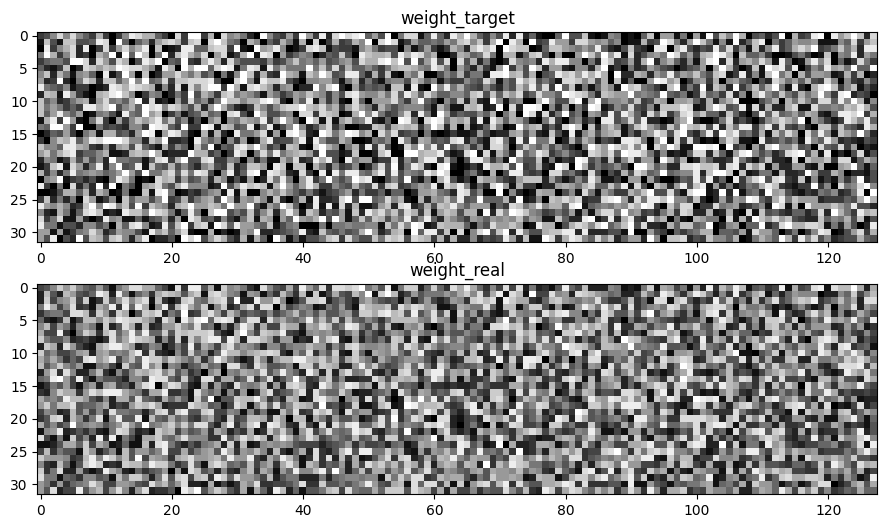

In [27]:
# 可视化
plt.figure(figsize=(18, 6))
plt.subplot(2, 1, 1)
plt.imshow(weight_target, cmap='gray')
plt.title('weight_target')
plt.subplot(2, 1, 2)
plt.imshow(weight_real, cmap='gray')
plt.title('weight_real')
plt.show()


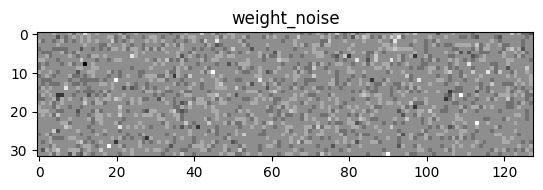

In [28]:
# 噪声
weight_noise = weight_real - weight_target
plt.imshow(weight_noise, cmap='gray')
plt.title('weight_noise')
plt.show()

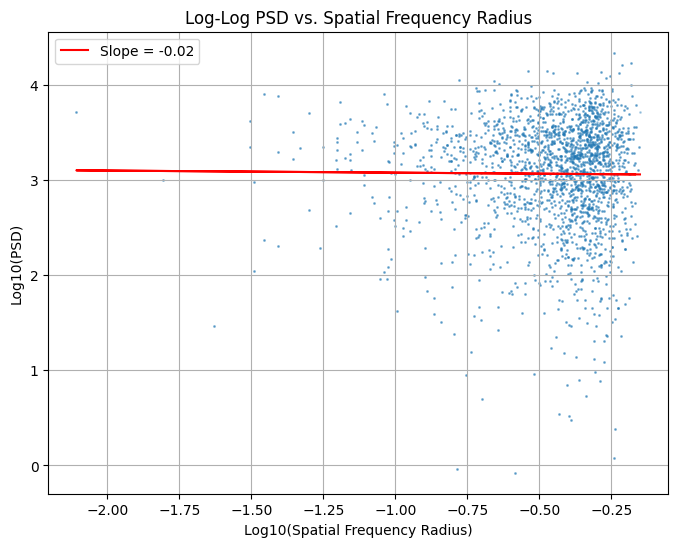

-0.021819349330400074

In [38]:
from scipy.fft import fft2, fftshift

# 输入噪声矩阵
input_matrix = weight_noise   # noise_1_f 

# 步骤1: 计算2D快速傅里叶变换（FFT）
fft_input_matrix = fft2(input_matrix)
fft_input_matrix_shifted = fftshift(fft_input_matrix)  # 将零频率分量移到中心

# 步骤2: 计算功率谱密度（PSD）
psd_input_matrix = np.abs(fft_input_matrix_shifted) ** 2

# 计算频率轴
freqs_x = np.fft.fftshift(np.fft.fftfreq(input_matrix.shape[0]))
freqs_y = np.fft.fftshift(np.fft.fftfreq(input_matrix.shape[1]))
radius = np.sqrt(freqs_x[:, None]**2 + freqs_y[None, :]**2)
radius_flat = radius.flatten()
psd_flat = psd_input_matrix.flatten()

# 移除零频率以避免对数运算中的问题
non_zero_indices = (radius_flat > 0) * (psd_flat > 0)
log_radius = np.log10(radius_flat[non_zero_indices])
log_psd = np.log10(psd_flat[non_zero_indices])

# 步骤3和4: 对数-对数图和线性回归估计斜率
plt.figure(figsize=(8, 6))
plt.scatter(log_radius, log_psd, alpha=0.3, s=1)
plt.xlabel('Log10(Spatial Frequency Radius)')
plt.ylabel('Log10(PSD)')
plt.title('Log-Log PSD vs. Spatial Frequency Radius')
plt.grid(True)

# 线性回归估计斜率
slope, intercept = np.polyfit(log_radius, log_psd, 1)
plt.plot(log_radius, slope*log_radius + intercept, 'r', label=f'Slope = {slope:.2f}')
plt.legend()
plt.show()

slope


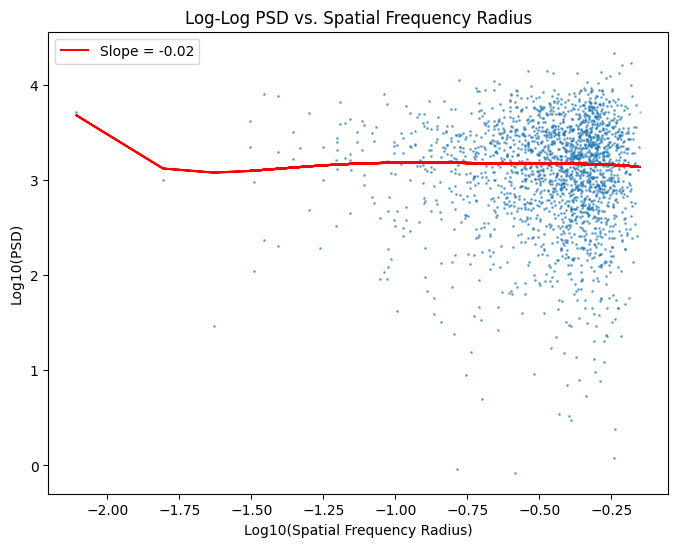

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(log_radius, log_psd, alpha=0.3, s=1)
plt.xlabel('Log10(Spatial Frequency Radius)')
plt.ylabel('Log10(PSD)')
plt.title('Log-Log PSD vs. Spatial Frequency Radius')
# plt.grid(True)

# 使用多项式回归
c5, c4, c3, c2, c1, c0 = np.polyfit(log_radius, log_psd, 5)
plt.plot(log_radius,  c5*log_radius ** 5 +  c4*log_radius ** 4 +  c3*log_radius ** 3 + c2*log_radius ** 2 + c1*log_radius + intercept, 'r', label=f'Slope = {slope:.2f}')
plt.legend()
plt.show()


In [40]:
np.polyfit(log_radius, log_psd, 2)

array([-0.01467251, -0.04120637,  3.0518448 ])

In [ ]:
slope

NameError: name 'slope' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_1_f_noise(size):
    # 生成白噪声
    white_noise = np.random.randn(size, size)
    # 进行傅里叶变换
    fft_noise = np.fft.fft2(white_noise)
    # 获取频率
    u, v = np.meshgrid(np.fft.fftfreq(size), np.fft.fftfreq(size), indexing='ij')
    # 计算频率的欧几里得距离，加一个小常数避免除以0
    freq = np.sqrt(u**2 + v**2) + 1e-12
    # 应用1/f滤波
    fft_noise_filtered = fft_noise / freq
    # 进行逆傅里叶变换
    noise_1_f = np.fft.ifft2(fft_noise_filtered).real
    return normalize(white_noise), normalize(noise_1_f)

def create_frequency_gradient(size):
    # 创建一个频率梯度矩阵，从高频到低频
    gradient = np.zeros((size, size))
    # 横向为高频到低频
    for i in range(size):
        for j in range(size):
            gradient[i, j] = np.sin(2 * np.pi * ((i + j) * (size / 2) / size)) * np.cos(2 * np.pi * ((i + j) * (size / 2) / size))
    return normalize(gradient)

def create_symmetric_frequency_wave(size):
    # 创建一个对称的频率波浪图
    wave = np.zeros((size, size))
    center = size // 2
    for i in range(size):
        for j in range(size):
            distance = np.sqrt((i - center)**2 + (j - center)**2)
            wave[i, j] = np.sin(2 * np.pi * distance / size * 10) * np.exp(-distance / size * 10)
    return wave

def normalize(matrix):
    # 归一化统一尺度
    min = matrix.min()
    max = matrix.max()
    return (matrix - min) / (max - min)

# 定义矩阵大小
size = 256
# 生成1/f噪声
white_noise, noise_1_f = generate_1_f_noise(size)

# 生成频率梯度图作为示例矩阵并添加1/f噪声
# original_matrix = create_frequency_gradient(size)
# 生成频率波浪图作为示例矩阵并添加1/f噪声
original_matrix = create_symmetric_frequency_wave(size)
matrix_with_noise = original_matrix + noise_1_f

# 可视化结果
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_matrix, cmap='gray')
plt.title('Original Matrix')
plt.subplot(1, 3, 2)
plt.imshow(noise_1_f, cmap='gray')
plt.title('1/f Noise')
plt.subplot(1, 3, 3)
plt.imshow(matrix_with_noise, cmap='gray')
plt.title('Matrix with 1/f Noise')
plt.show()
